<a href="https://colab.research.google.com/github/feliperamon1/Personal/blob/main/Act2_IBERO_B%C3%BAsquedaSistemasBasadosEnReglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Actividad 2 - Búsqueda y sistemas basados en reglas

In [ ]:
# Importar las librerias
import pandas as pd
from itertools import permutations
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Datos de distancias y duraciones
data = {
    'Ruta': [
        'Medellín - Cartagena', 'Medellín - Bogotá', 'Medellín - Bucaramanga',
        'Medellín - Cali', 'Cartagena - Bogotá', 'Cartagena - Bucaramanga',
        'Cartagena - Cali', 'Bogotá - Bucaramanga', 'Bogotá - Cali',
        'Bucaramanga - Cali'
    ],
    'Distancia Carretera (km)': [640, 413, 387, 329, 1048, 720, 1178, 400, 462, 686],
    'Duración Carretera (horas)': [11.8, 8, 8, 8, 18, 13, 22, 8, 10, 12],
    'Distancia Vuelo (km)': [461, 215, 284, 329, 653, 462, 748, 297, 300, 471],
    'Duración Vuelo (horas)': [1.0, 0.75, 1.0, 0.75, 1.5, 1.0, 1.75, 1.0, 1.0, 1.25]
}

distancias_data = {
    'Ciudad_Origen': [
        'Medellín', 'Medellín', 'Medellín', 'Medellín', 'Cartagena',
        'Cartagena', 'Cartagena', 'Bogotá', 'Bogotá', 'Bucaramanga',
        'Cartagena', 'Bogotá', 'Bucaramanga', 'Cali', 'Bucaramanga', 'Cali'
    ],
    'Ciudad_Destino': [
        'Cartagena', 'Bogotá', 'Bucaramanga', 'Cali', 'Bogotá',
        'Bucaramanga', 'Cali', 'Bucaramanga', 'Cali', 'Cali',
        'Medellín', 'Medellín', 'Medellín', 'Medellín', 'Cartagena', 'Cartagena'
    ],
    'Distancia_Carretera_km': [640, 413, 387, 329, 1048, 720, 1178, 400, 462, 686, 640, 413, 387, 329, 720, 1178],
    'Duración_Carretera_horas': [11.8, 8, 8, 8, 18, 13, 22, 8, 10, 12, 11.8, 8, 8, 8, 13, 22],
    'Distancia_Vuelo_km': [461, 215, 284, 329, 653, 462, 748, 297, 300, 471, 461, 215, 284, 329, 462, 748],
    'Duración_Vuelo_horas': [1.0, 0.75, 1.0, 0.75, 1.5, 1.0, 1.75, 1.0, 1.0, 1.25, 1.0, 0.75, 1.0, 0.75, 1.0, 1.75]
}

# Datos de costos
costos_data = {
    'Ruta': ['Medellín - Cartagena', 'Medellín - Bogotá', 'Medellín - Bucaramanga', 'Medellín - Cali',
             'Cartagena - Bogotá', 'Cartagena - Bucaramanga', 'Cartagena - Cali',
             'Bogotá - Bucaramanga', 'Bogotá - Cali', 'Bucaramanga - Cali'],
    'Costo_Carretera_COP': [372900, 228000, 206000, 180000, 430000, 290000, 470000, 200000, 250000, 300000],
    'Costo_Avion_Latam_COP': [300000, 220000, 250000, 200000, 350000, 280000, 400000, 180000, 200000, 270000],
    'Costo_Avion_Avianca_COP': [280000, 200000, 230000, 190000, 330000, 260000, 380000, 170000, 190000, 260000],
    'Costo_Avion_Wingo_COP': [250000, 180000, 210000, 170000, 300000, 240000, 350000, 150000, 170000, 240000]
}

# Datos de costos
costos_carretera = {
    'Ruta': ['Medellín - Cartagena', 'Medellín - Bogotá'],
    'Peajes (COP)': [122900, 78000],
    'Gasolina (aprox.) (COP)': [250000, 150000],
}

costos_avion = {
    'Ruta': ['Medellín - Cartagena', 'Medellín - Bogotá'],
    'LATAM (COP)': [300000, 220000],
    'Avianca (COP)': [280000, 200000],
    'Wingo (COP)': [250000, 180000],
}

# Crear DataFrames
df_distancias = pd.DataFrame(data)
df_costos_carretera = pd.DataFrame(costos_carretera)
df_costos_avion = pd.DataFrame(costos_avion)

# Visualización de DataFrames
print("Distancias y Duraciones")
print(df_distancias)

print("\nCostos de Viaje por Carretera")
print(df_costos_carretera)

print("\nCostos de Viaje en Avión")
print(df_costos_avion)

Distancias y Duraciones
                      Ruta  Distancia Carretera (km)  \
0     Medellín - Cartagena                       640   
1        Medellín - Bogotá                       413   
2   Medellín - Bucaramanga                       387   
3          Medellín - Cali                       329   
4       Cartagena - Bogotá                      1048   
5  Cartagena - Bucaramanga                       720   
6         Cartagena - Cali                      1178   
7     Bogotá - Bucaramanga                       400   
8            Bogotá - Cali                       462   
9       Bucaramanga - Cali                       686   

   Duración Carretera (horas)  Distancia Vuelo (km)  Duración Vuelo (horas)  
0                        11.8                   461                    1.00  
1                         8.0                   215                    0.75  
2                         8.0                   284                    1.00  
3                         8.0                  

In [ ]:
# Crear DataFrame costos
df_costos = pd.DataFrame(costos_data)
df_costos

,Ruta,Costo_Carretera_COP,Costo_Avion_Latam_COP,Costo_Avion_Avianca_COP,Costo_Avion_Wingo_COP
0,Medellín - Cartagena,372900,300000,280000,250000
1,Medellín - Bogotá,228000,220000,200000,180000
2,Medellín - Bucaramanga,206000,250000,230000,210000
3,Medellín - Cali,180000,200000,190000,170000
4,Cartagena - Bogotá,430000,350000,330000,300000
5,Cartagena - Bucaramanga,290000,280000,260000,240000
6,Cartagena - Cali,470000,400000,380000,350000
7,Bogotá - Bucaramanga,200000,180000,170000,150000
8,Bogotá - Cali,250000,200000,190000,170000
9,Bucaramanga - Cali,300000,270000,260000,240000


In [ ]:
# Crear DataFrame distancias
df_distancias = pd.DataFrame(distancias_data)
df_distancias

,Ciudad_Origen,Ciudad_Destino,Distancia_Carretera_km,Duración_Carretera_horas,Distancia_Vuelo_km,Duración_Vuelo_horas
0,Medellín,Cartagena,640,11.8,461,1.00
1,Medellín,Bogotá,413,8.0,215,0.75
2,Medellín,Bucaramanga,387,8.0,284,1.00
3,Medellín,Cali,329,8.0,329,0.75
4,Cartagena,Bogotá,1048,18.0,653,1.50
5,Cartagena,Bucaramanga,720,13.0,462,1.00
6,Cartagena,Cali,1178,22.0,748,1.75
7,Bogotá,Bucaramanga,400,8.0,297,1.00
8,Bogotá,Cali,462,10.0,300,1.00
9,Bucaramanga,Cali,686,12.0,471,1.25


In [ ]:
# Función para calcular el tiempo total de un recorrido dado carretera
def calcular_tiempo_total(ruta, modo='carretera'):
    tiempo_total = 0
    for i in range(len(ruta) - 1):
        origen = ruta[i]
        destino = ruta[i + 1]
        if modo == 'carretera':
            filtro = (df_distancias['Ciudad_Origen'] == origen) & (df_distancias['Ciudad_Destino'] == destino)
            if df_distancias[filtro].empty:
                filtro = (df_distancias['Ciudad_Origen'] == destino) & (df_distancias['Ciudad_Destino'] == origen)
            tiempo = df_distancias[filtro]['Duración_Carretera_horas'].values[0]
        else:
            filtro = (df_distancias['Ciudad_Origen'] == origen) & (df_distancias['Ciudad_Destino'] == destino)
            if df_distancias[filtro].empty:
                filtro = (df_distancias['Ciudad_Origen'] == destino) & (df_distancias['Ciudad_Destino'] == origen)
            tiempo = df_distancias[filtro]['Duración_Carretera_horas'].values[0]
        tiempo_total += tiempo
    return tiempo_total

# Lista de ciudades
ciudades = ['Medellín', 'Cartagena', 'Bogotá', 'Bucaramanga', 'Cali']

# Generar todas las permutaciones posibles de las ciudades
rutas = permutations(ciudades)

# Encontrar la ruta con el menor tiempo total
mejor_ruta = None
menor_tiempo = float('inf')

for ruta in rutas:
    try:
        tiempo = calcular_tiempo_total(ruta, modo='carretera')  # Puede cambiarse a 'avion' para otro modo
        if tiempo < menor_tiempo:
            menor_tiempo = tiempo
            mejor_ruta = ruta
    except IndexError:
        print(f"No se encontró una ruta válida entre {ruta[i]} y {ruta[i+1]}.")

# Visualización de la mejor ruta y el tiempo total
print("Mejor ruta en carretera:", " -> ".join(mejor_ruta))
print("Tiempo total (horas):", menor_tiempo)
print("El problema no tiene en cuenta tiempos de desplazamiento a terminales, ni tiempos de espera, ni refrigerios.")



Mejor ruta en carretera: Cartagena -> Bucaramanga -> Bogotá -> Medellín -> Cali
Tiempo total (horas): 37.0
El problema no tiene en cuenta tiempos de desplazamiento a terminales, ni tiempos de espera, ni refrigerios.


In [ ]:
# Función para calcular el tiempo total de un recorrido dado avion cambiar carretera por avion

def calcular_tiempo_total_avion(ruta, modo='avion'):
    tiempo_total_avion = 0
    for i in range(len(ruta) - 1):
        origen = ruta[i]
        destino = ruta[i + 1]
        if modo == 'avion':
            filtro = (df_distancias['Ciudad_Origen'] == origen) & (df_distancias['Ciudad_Destino'] == destino)
            if df_distancias[filtro].empty:
                filtro = (df_distancias['Ciudad_Origen'] == destino) & (df_distancias['Ciudad_Destino'] == origen)
            tiempo = df_distancias[filtro]['Duración_Vuelo_horas'].values[0]
        else:
            filtro = (df_distancias['Ciudad_Origen'] == origen) & (df_distancias['Ciudad_Destino'] == destino)
            if df_distancias[filtro].empty:
                filtro = (df_distancias['Ciudad_Origen'] == destino) & (df_distancias['Ciudad_Destino'] == origen)
            tiempo = df_distancias[filtro]['Duración_Vuelo_horas'].values[0]
        tiempo_total_avion += tiempo
    return tiempo_total_avion

# Lista de ciudades
ciudades = ['Medellín', 'Cartagena', 'Bogotá', 'Bucaramanga', 'Cali']

# Generar todas las permutaciones posibles de las ciudades
rutas = permutations(ciudades)

# Encontrar la ruta con el menor tiempo total
mejor_ruta = None
menor_tiempo = float('inf')

for ruta in rutas:
    try:
        tiempo = calcular_tiempo_total_avion(ruta, modo='avion')
        if tiempo < menor_tiempo:
            menor_tiempo = tiempo
            mejor_ruta = ruta
    except IndexError:
        print(f"No se encontró una ruta válida entre {ruta[i]} y {ruta[i+1]}.")

# Visualización de la mejor ruta y el tiempo total
print("Mejor ruta en avion:", " -> ".join(mejor_ruta))
print("Tiempo total (horas):", menor_tiempo," horas, sin contar los tiempos de desplazamiento y las rutinas típicas de un vuelo.")
print("El problema no tiene en cuenta tiempos de desplazamiento a aeropuertos, ni tiempos de espera, ni refrigerios.")

Mejor ruta en avion: Cartagena -> Bucaramanga -> Bogotá -> Medellín -> Cali
Tiempo total (horas): 3.5  horas, sin contar los tiempos de desplazamiento y las rutinas típicas de un vuelo.
El problema no tiene en cuenta tiempos de desplazamiento a aeropuertos, ni tiempos de espera, ni refrigerios.


In [ ]:
# Visualización de los DataFrames para verificar los datos
print("Distancias y Duraciones")
print(df_distancias)

print("\nCostos de Viaje por Carretera")
print(df_costos_carretera)


print("\nCostos de Viaje en Avión")
print(df_costos_avion)

# Crear DataFrame
#df_distancias = pd.DataFrame(df_distancias)
#df_distancias

#df_costos_carretera = pd.DataFrame(df_costos_carretera)
#df_costos_carretera

#df_costos_avion = pd.DataFrame(df_costos_avion)
#df_costos_avion

Distancias y Duraciones
   Ciudad_Origen Ciudad_Destino  Distancia_Carretera_km  \
0       Medellín      Cartagena                     640   
1       Medellín         Bogotá                     413   
2       Medellín    Bucaramanga                     387   
3       Medellín           Cali                     329   
4      Cartagena         Bogotá                    1048   
5      Cartagena    Bucaramanga                     720   
6      Cartagena           Cali                    1178   
7         Bogotá    Bucaramanga                     400   
8         Bogotá           Cali                     462   
9    Bucaramanga           Cali                     686   
10     Cartagena       Medellín                     640   
11        Bogotá       Medellín                     413   
12   Bucaramanga       Medellín                     387   
13          Cali       Medellín                     329   
14   Bucaramanga      Cartagena                     720   
15          Cali      Cartagena 

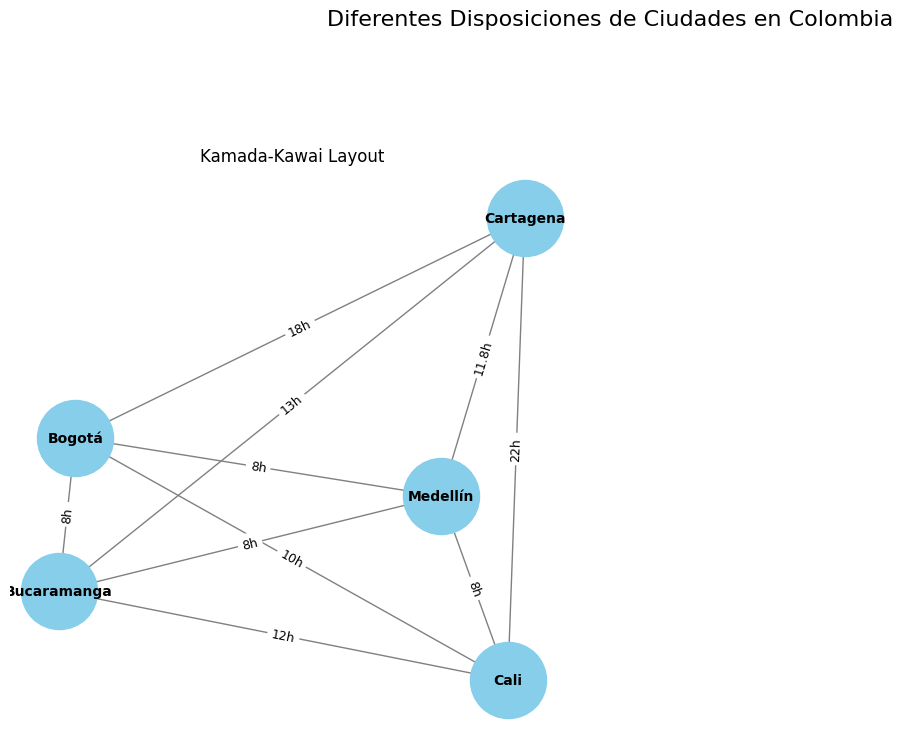

No es un grafico de referencia geográfica, solo es una referencia matemática


In [ ]:
# Crear un grafo que ilustre la situación
G = nx.Graph()

# Agregar nodos (ciudades)
ciudades = ['Medellín', 'Cartagena', 'Bogotá', 'Bucaramanga', 'Cali']
G.add_nodes_from(ciudades)

# Agregar aristas (rutas) con etiquetas de duración en horas (puedes usar la duración de carreteras o vuelos)
aristas = [
    ('Medellín', 'Cartagena', 11.8),
    ('Medellín', 'Bogotá', 8),
    ('Medellín', 'Bucaramanga', 8),
    ('Medellín', 'Cali', 8),
    ('Cartagena', 'Bogotá', 18),
    ('Cartagena', 'Bucaramanga', 13),
    ('Cartagena', 'Cali', 22),
    ('Bogotá', 'Bucaramanga', 8),
    ('Bogotá', 'Cali', 10),
    ('Bucaramanga', 'Cali', 12)
]

# Agregar las aristas al grafo
for (origen, destino, duracion) in aristas:
    G.add_edge(origen, destino, weight=duracion)

# Diferentes layouts
layouts = {
  # 'Spring Layout': nx.spring_layout(G),
  # 'Circular Layout': nx.circular_layout(G),
   # 'Shell Layout': nx.shell_layout(G),
    'Kamada-Kawai Layout': nx.kamada_kawai_layout(G)
}

# Dibujar el grafo con diferentes layouts
plt.figure(figsize=(16, 16))
for i, (layout_name, pos) in enumerate(layouts.items(), start=1):
    plt.subplot(2, 2, i)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
    edge_labels = {(origen, destino): f"{duracion}h" for (origen, destino, duracion) in aristas}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
    plt.title(layout_name)

plt.suptitle("Diferentes Disposiciones de Ciudades en Colombia", fontsize=16)
plt.show()
print("No es un grafico de referencia geográfica, solo es una referencia matemática")

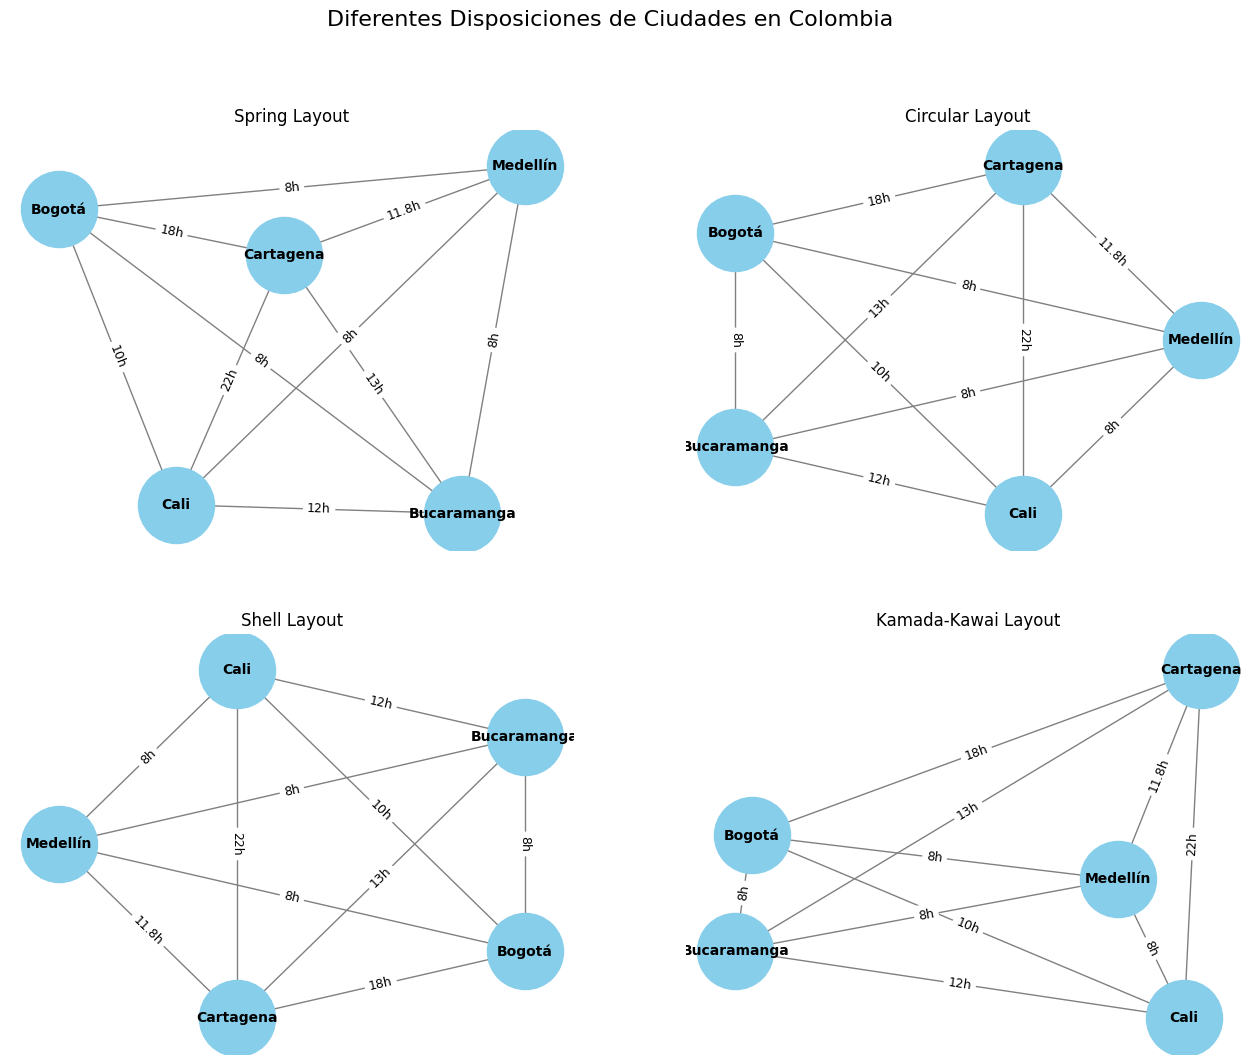

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo no dirigido
G = nx.Graph()

# Agregar nodos (ciudades)
ciudades = ['Medellín', 'Cartagena', 'Bogotá', 'Bucaramanga', 'Cali']
G.add_nodes_from(ciudades)

# Agregar aristas (rutas) con etiquetas de duración en horas (puedes usar la duración de carreteras o vuelos)
aristas = [
    ('Medellín', 'Cartagena', 11.8),
    ('Medellín', 'Bogotá', 8),
    ('Medellín', 'Bucaramanga', 8),
    ('Medellín', 'Cali', 8),
    ('Cartagena', 'Bogotá', 18),
    ('Cartagena', 'Bucaramanga', 13),
    ('Cartagena', 'Cali', 22),
    ('Bogotá', 'Bucaramanga', 8),
    ('Bogotá', 'Cali', 10),
    ('Bucaramanga', 'Cali', 12)
]

# Agregar las aristas al grafo
for (origen, destino, duracion) in aristas:
    G.add_edge(origen, destino, weight=duracion)

# Diferentes layouts
layouts = {
    'Spring Layout': nx.spring_layout(G),
    'Circular Layout': nx.circular_layout(G),
    'Shell Layout': nx.shell_layout(G),
    'Kamada-Kawai Layout': nx.kamada_kawai_layout(G)
}

# Dibujar el grafo con diferentes layouts
plt.figure(figsize=(16, 12))
for i, (layout_name, pos) in enumerate(layouts.items(), start=1):
    plt.subplot(2, 2, i)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
    edge_labels = {(origen, destino): f"{duracion}h" for (origen, destino, duracion) in aristas}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
    plt.title(layout_name)

plt.suptitle("Diferentes Disposiciones de Ciudades en Colombia", fontsize=16)
plt.show()
